# 무주 반딧불 축제 EDA

## OD 데이터

In [1]:
import os
import pandas as pd

# 'data/raw_data' 경로 설정
root_dir = '../../data/raw_data'
df = pd.DataFrame()
address = pd.read_csv("../../data/address_with_lon_lat_final.csv")
mooju = set(list(address[address['시군구명'] == '무주군']['행정동코드']))

# 전처리코드는 모두 여기에
def preprocess(df):
    # dest_hdong_cd 값이 축제가 열리는 곳인 무주군 데이터만 필터링
    filtered_df = df[df['dest_hdong_cd'].isin(mooju)]

    #filtered_df = df[df['dest_hdong_cd'] == 4573025000]
    """#filtered_df = df[df['dest_hdong_cd'] == 4573025000]
    df = pd.merge(df, address[['행정동코드', '시도명', '시군구명']], 
                     left_on='dest_hdong_cd', right_on='행정동코드', how='left')

    # 병합 후 불필요한 '행정동코드' 컬럼 제거 (필요에 따라)
    df = df.drop(columns=['행정동코드'])

    filtered_df = df[df['시군구명'] == '무주군']

    filtered_df = filtered_df.drop(columns=['시도명', '시군구명'])"""

    # 타 지역에서 온 데이터만 필터링
    #filtered_df = filtered_df[filtered_df['origin_hdong_cd'] != filtered_df['dest_hdong_cd']]
    filtered_df = filtered_df[~filtered_df['origin_hdong_cd'].isin(mooju)]

    # 체류목적이 3(쇼핑여가), 4(기타), 5(여행) 인경우만 
    filtered_df = filtered_df[(filtered_df['dest_purpose'] == 3) | 
                          (filtered_df['dest_purpose'] == 4) | 
                          (filtered_df['dest_purpose'] == 5)]

    return filtered_df

# 'od'로 시작하는 폴더 내의 모든 CSV 파일 처리
for dirpath, dirnames, filenames in os.walk(root_dir):
    if os.path.basename(dirpath).startswith('od'):
        for filename in filenames:
            if filename.endswith('.csv'):
                # 파일 이름에서 날짜 추출
                date_str = filename.split('_')[1]
                
                # 파일 경로 설정 및 CSV 읽기
                file_path = os.path.join(dirpath, filename)
                csv_data = pd.read_csv(file_path)
                
                # 전처리
                filtered_data = preprocess(csv_data)

                # 날짜에서 월일(MMDD) 부분 추출
                mmdd_str = date_str[4:]  # 'YYYYMMDD'에서 마지막 네 자리 'MMDD' 추출
                
                # 동적으로 변수 생성 (예: df_0901)
                globals()[f'df_{mmdd_str}'] = filtered_data
                
                # 데이터프레임 이름 출력 (예: df_0901)
                print(f"데이터프레임 df_{mmdd_str}가 생성되었고, 기존데이터프레임에 포함합니다.")
                df = pd.concat([df, globals()[f'df_{mmdd_str}']])

데이터프레임 df_0901가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0902가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0903가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0904가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0905가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0906가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0907가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0908가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0909가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0910가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0911가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0912가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0913가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0914가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0915가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0916가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0917가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0918가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0919가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0920가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0921가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0922가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0923가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0924가 생성되었고, 기존데이터프레임에 포함합니다.
데이터프레임 df_0925가 생성되었고, 기존데이터프레임에 포함합니다.


In [2]:
df

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
31518,4311374100,4573032000,20230901,17:00,19:00,1,5,0.0,4.0,5,253065,134,7
31892,1117052000,4573034000,20230901,19:00,22:00,1,2,5.0,4.0,5,411638,159,8
33087,4824025000,4573034000,20230901,13:00,14:00,1,2,0.0,0.0,5,196431,93,8
57374,4571033000,4573034000,20230901,22:00,23:00,0,2,0.0,5.0,5,267407,59,7
110435,4420025300,4573034000,20230901,13:00,15:00,1,0,0.0,0.0,5,320664,126,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163107,3611057000,4573025000,20231015,14:00,16:00,0,3,0.0,4.0,5,153828,114,6
3188082,4374025000,4573033000,20231015,13:00,14:00,0,3,0.0,0.0,5,71188,45,6
3223353,3020054800,4573032000,20231015,12:00,14:00,0,4,0.0,0.0,3,222933,151,6
3226642,3017059700,4573035000,20231015,11:00,12:00,1,4,0.0,0.0,5,113252,55,5


In [3]:
"""
축제기간과 축제기간이 아닌 날의 데이터를 구분지어 불러오기
축제기간: 23.09.02~23.09.10
비축제기간: 23.09.11~23.10.15
"""
festival_df = df[(df['date'] >= 20230902) & (df['date'] <= 20230910)]
non_festival_df = df[(df['date'] >= 20230916) & (df['date'] <= 20230924)]

In [4]:
festival_df

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
1096,4311374100,4573031000,20230902,09:00,11:00,1,0,0.0,0.0,5,163782,109,6
2845,4511364100,4573025000,20230902,11:00,13:00,0,4,0.0,0.0,3,185125,140,7
3874,4812965000,4573034000,20230902,16:00,18:00,0,4,0.0,4.0,5,424072,131,7
4218,4817073000,4573032000,20230902,13:00,16:00,1,0,0.0,0.0,5,119100,141,9
4998,4311258000,4573025000,20230902,17:00,18:00,0,0,0.0,2.0,4,86425,100,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229495,4719051000,4573033000,20230910,08:00,11:00,0,3,0.0,0.0,5,309896,154,6
3237279,4574036000,4573034000,20230910,12:00,12:00,0,1,1.0,5.0,5,38926,27,5
3239981,4572025000,4573033000,20230910,18:00,18:00,0,3,0.0,5.0,5,50623,33,6
3246695,4572032000,4573034000,20230910,17:00,17:00,0,1,1.0,4.0,4,33474,22,5


In [5]:
festival_df['od_cnts'].unique()

array([  6,   7,   9,  12,  14,  28,   8,  40,  32,  50,  11,  80,   5,
        42,  23,  13,  17,  19,  41,  46,  15,  21, 100,  10,  20],
      dtype=int64)

In [6]:
festival_df[festival_df['od_cnts'] == 100]

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
3059393,2826074000,4573034000,20230908,17:00,22:00,0,0,0.0,0.0,5,615825,274,100


In [7]:
address[address['행정동코드'] == 2826074000]

,행정동코드,시도명,시군구명,읍면동명,동리명,위도,경도
1891,2826074000,인천광역시,서구,아라동,원당동,37.596114,126.705112
1892,2826074000,인천광역시,서구,아라동,당하동,37.590735,126.676215


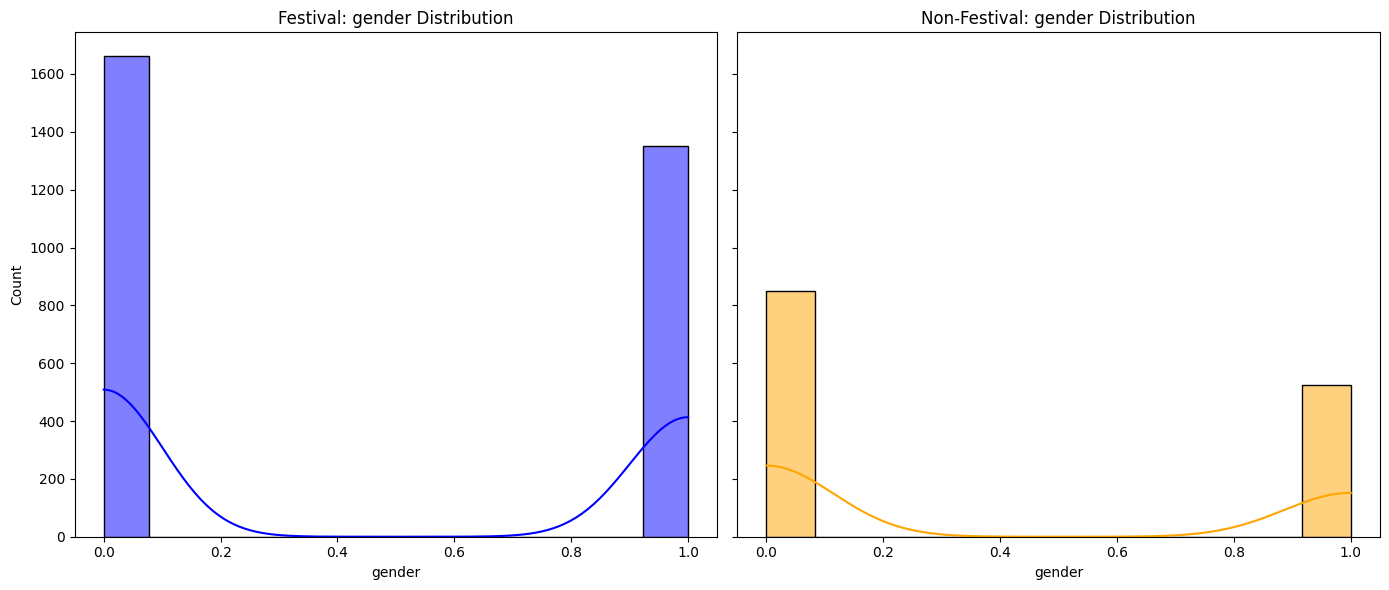

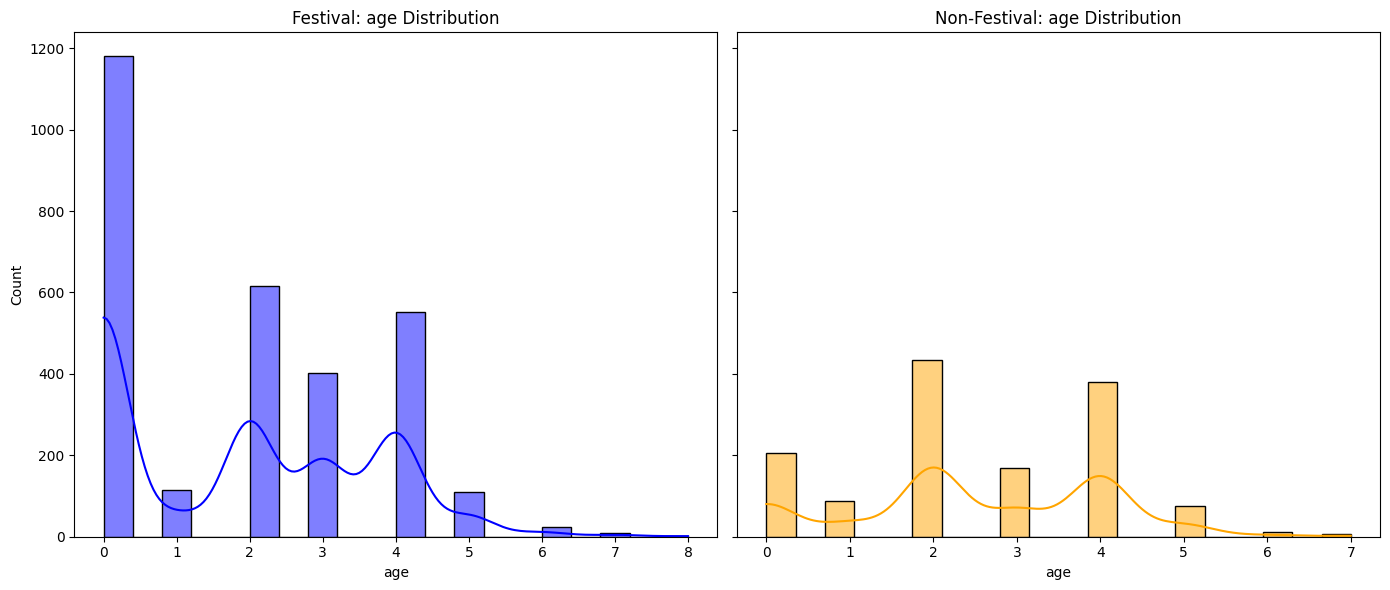

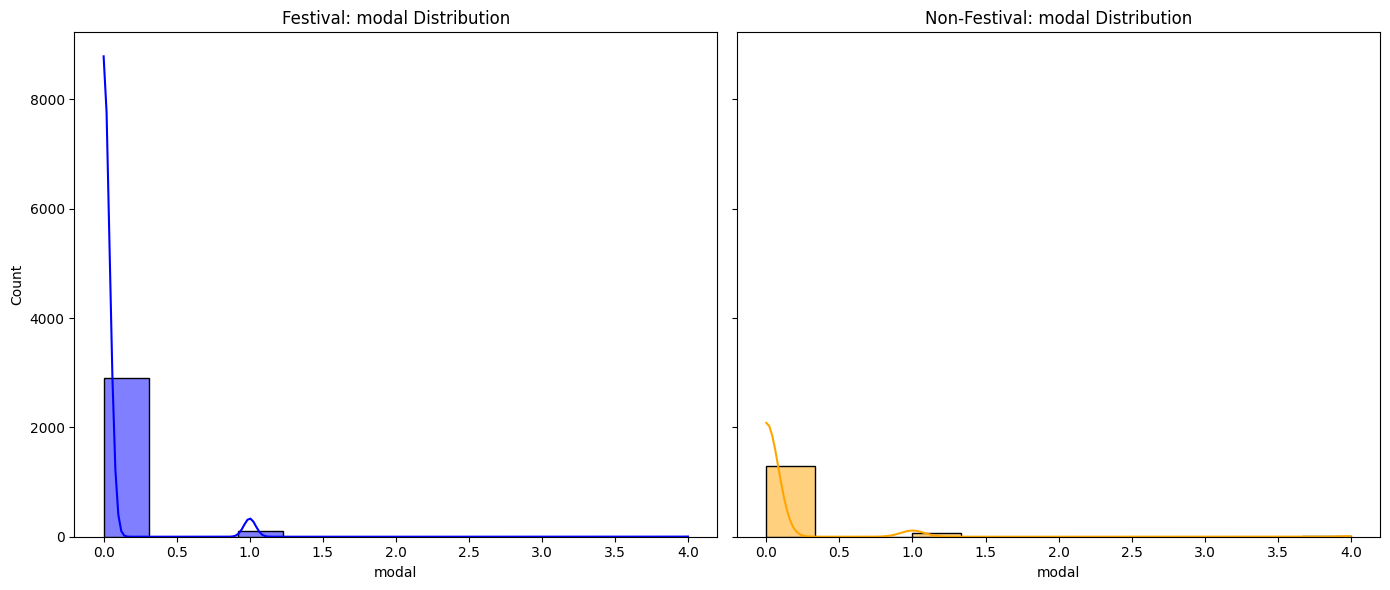

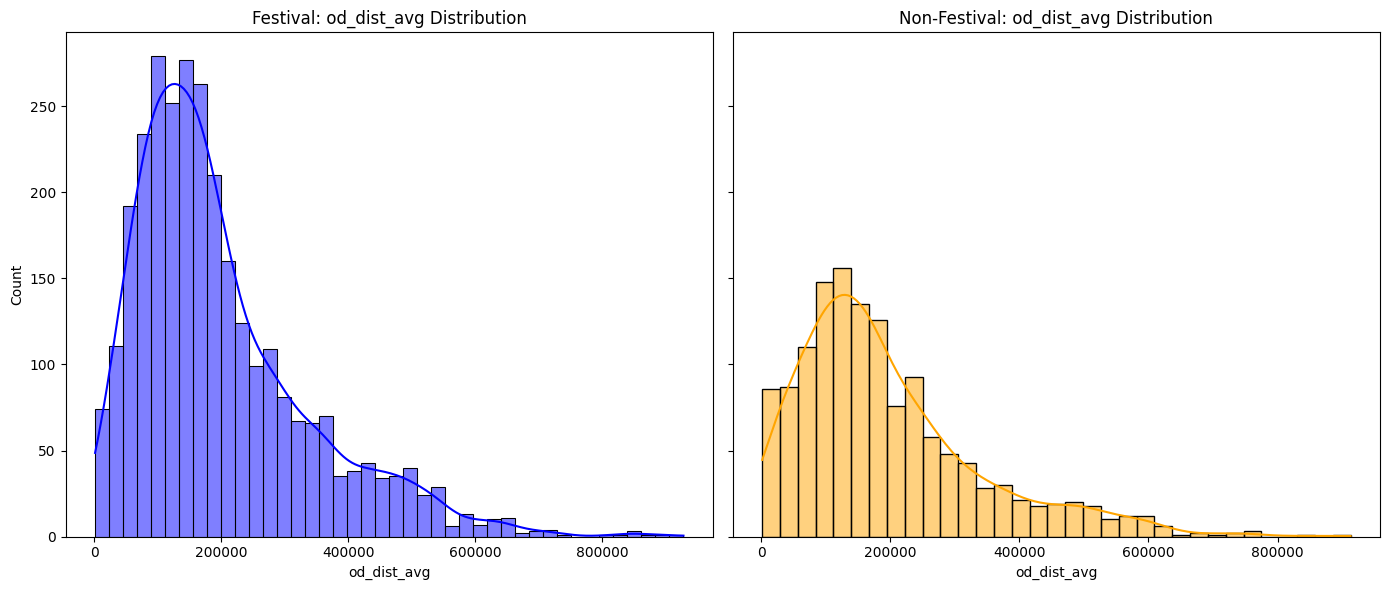

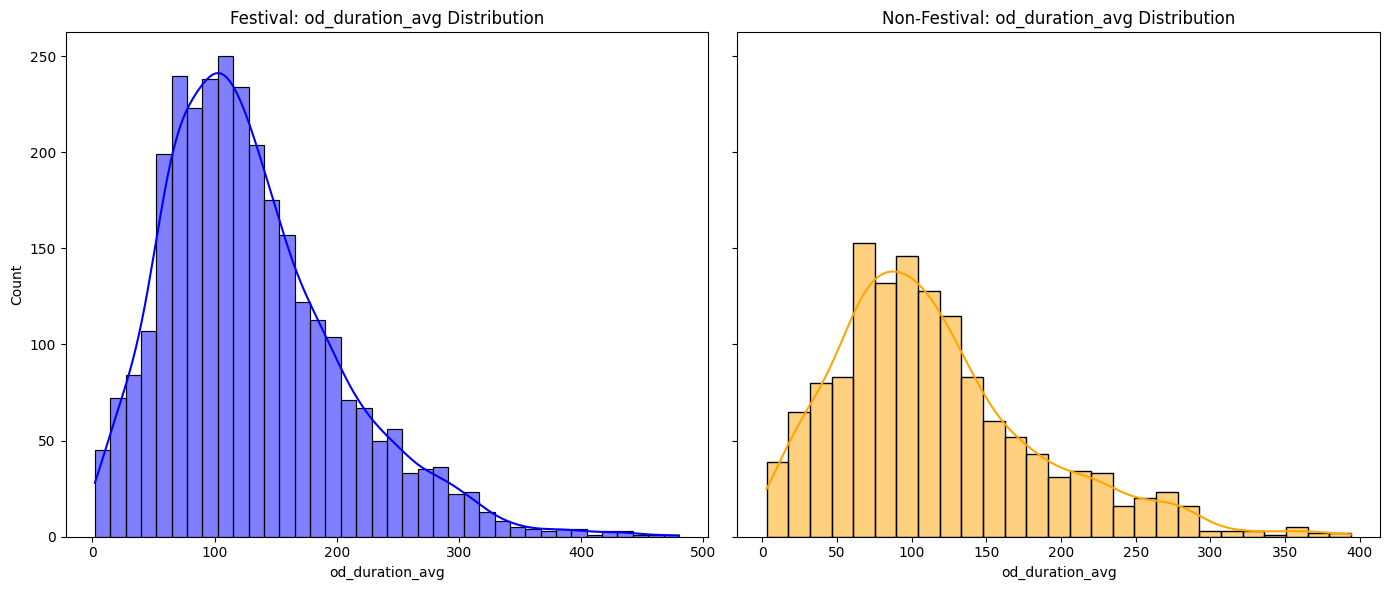

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 분포 시각화를 위한 함수 정의
def plot_distributions(column):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # 왼쪽: festival_df 분포
    sns.histplot(festival_df[column], kde=True, ax=axes[0], color='blue')
    axes[0].set_title(f'Festival: {column} Distribution')

    # 오른쪽: non_festival_df 분포
    sns.histplot(non_festival_df[column], kde=True, ax=axes[1], color='orange')
    axes[1].set_title(f'Non-Festival: {column} Distribution')

    plt.tight_layout()
    plt.show()

# 비교하고 싶은 컬럼별로 분포 시각화 실행
for column in ['gender', 'age', 'modal', 'od_dist_avg', 'od_duration_avg']:  # 원하는 컬럼을 여기에 추가
    plot_distributions(column)

In [9]:
# 날짜별 od_cnts 합산 (축제 기간과 비축제 기간)
festival_df_grouped = festival_df.groupby('date')['od_cnts'].sum().reset_index()
non_festival_df_grouped = non_festival_df.groupby('date')['od_cnts'].sum().reset_index()


C:\Users\qh123\AppData\Local\Temp\ipykernel_10812\281776168.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='date', y='od_cnts', data=festival_df_grouped, ax=axes[0], palette='Blues_d')
C:\Users\qh123\AppData\Local\Temp\ipykernel_10812\281776168.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xticklabels, rotation=45)
C:\Users\qh123\AppData\Local\Temp\ipykernel_10812\281776168.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='date', y='od_cnts', data=non_festival_df_grouped, ax=axes[1], palette='Oranges_d')
C:\Users\qh123\AppData\Local\Temp\ipykernel_10812\281776168.py:37: UserWarning: FixedFormatter should only be use

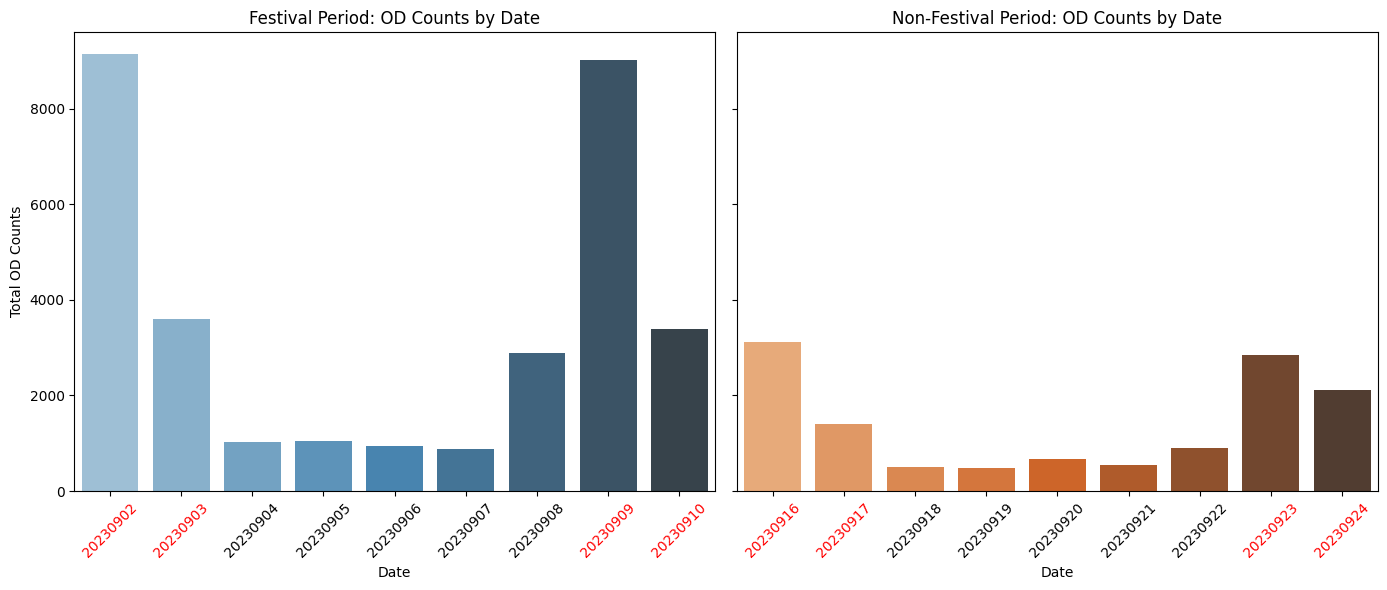

In [10]:
# 주말 날짜 리스트
weekend_dates = [20230902, 20230903, 20230909, 20230910, 20230916, 20230917, 20230923, 20230924, 20230930, 20231001, 2023107, 20231008, 20231014, 20231015]

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# 왼쪽: festival_df 날짜별 od_cnts 합산 시각화
sns.barplot(x='date', y='od_cnts', data=festival_df_grouped, ax=axes[0], palette='Blues_d')
axes[0].set_title('Festival Period: OD Counts by Date')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total OD Counts')

# 주말 날짜 빨간색 처리
xticks = axes[0].get_xticks()
xticklabels = axes[0].get_xticklabels()
for i, label in enumerate(xticklabels):
    date_value = int(label.get_text())
    if date_value in weekend_dates:
        label.set_color('red')

axes[0].set_xticklabels(xticklabels, rotation=45)

# 오른쪽: non_festival_df 날짜별 od_cnts 합산 시각화
sns.barplot(x='date', y='od_cnts', data=non_festival_df_grouped, ax=axes[1], palette='Oranges_d')
axes[1].set_title('Non-Festival Period: OD Counts by Date')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total OD Counts')

# 주말 날짜 빨간색 처리
xticks = axes[1].get_xticks()
xticklabels = axes[1].get_xticklabels()
for i, label in enumerate(xticklabels):
    date_value = int(label.get_text())
    if date_value in weekend_dates:
        label.set_color('red')

axes[1].set_xticklabels(xticklabels, rotation=45)

plt.tight_layout()
plt.show()

In [11]:
# 'date'와 'origin_hdong_cd'을 기준으로 'od_cnts'를 집계
festival_df_grouped_2 = festival_df.groupby(['origin_hdong_cd'])['od_cnts'].sum().reset_index()

# df_1의 'origin_hdong_cd'와 df_2의 '행정동코드'를 기준으로 병합
festival_df_grouped_2 = pd.merge(festival_df_grouped_2, address[['행정동코드', '시도명', '시군구명']], 
                     left_on='origin_hdong_cd', right_on='행정동코드', how='left')

# 병합 후 불필요한 '행정동코드' 컬럼 제거 (필요에 따라)
festival_df_grouped_2 = festival_df_grouped_2.drop(columns=['행정동코드'])

festival_df_grouped_2.drop_duplicates(inplace=True)

festival_df_grouped_2

,origin_hdong_cd,od_cnts,시도명,시군구명
0,1111061500,5,서울특별시,종로구
29,1111069000,5,서울특별시,종로구
30,1114057000,5,서울특별시,중구
41,1117068500,12,서울특별시,용산구
42,1120067000,6,서울특별시,성동구
...,...,...,...,...
5132,5113054100,12,강원특별자치도,원주시
5133,5113059000,30,강원특별자치도,원주시
5134,5113066000,12,강원특별자치도,원주시
5136,5113067500,24,강원특별자치도,원주시


In [12]:
# '시도명'별로 'od_cnts' 합계를 구한 후 'od_cnts' 기준으로 정렬
festival_df_grouped_sido = festival_df_grouped_2.groupby('시도명')['od_cnts'].sum().reset_index()

# 'od_cnts' 기준으로 내림차순 정렬
festival_df_grouped_sido = festival_df_grouped_sido.sort_values(by='od_cnts', ascending=False)

# 결과 출력
festival_df_grouped_sido

,시도명,od_cnts
13,전라북도,8863
6,대전광역시,5737
2,경상남도,3235
14,충청남도,2413
15,충청북도,2314
1,경기도,1832
5,대구광역시,1686
3,경상북도,1666
4,광주광역시,1092
9,세종특별자치시,999


In [13]:
festival_df_grouped_sido['od_cnts'].sum()

31954

In [16]:
# '시도명'별로 'od_cnts' 합계를 구한 후 'od_cnts' 기준으로 정렬
junbok_filtered = festival_df_grouped_2[festival_df_grouped_2['시도명'] == '전라북도']
festival_df_grouped_junbok = junbok_filtered.groupby('시군구명')['od_cnts'].sum().reset_index()

# 'od_cnts' 기준으로 내림차순 정렬
festival_df_grouped_junbok = festival_df_grouped_junbok.sort_values(by='od_cnts', ascending=False)

# 결과 출력
festival_df_grouped_junbok.head(5)

,시군구명,od_cnts
10,전주시 덕진구,2834
11,전주시 완산구,1561
9,장수군,1139
7,익산시,772
13,진안군,704


In [17]:
# '전주시 덕진구' 또는 '전주시'에 해당하는 '행정동코드' 추출
duckjin = address[(address['시군구명'] == '전주시 덕진구') | (address['시군구명'] == '전주시 완산구')]['행정동코드'].unique()

# 추출한 행정동코드에 해당하는 데이터를 festival_df에서 필터링
duckjin_df = festival_df[festival_df['origin_hdong_cd'].isin(duckjin)]

# 결과 출력
duckjin_df

,origin_hdong_cd,dest_hdong_cd,date,start_time,end_time,gender,age,modal,origin_purpose,dest_purpose,od_dist_avg,od_duration_avg,od_cnts
2845,4511364100,4573025000,20230902,11:00,13:00,0,4,0.0,0.0,3,185125,140,7
15801,4511173000,4573033000,20230902,17:00,22:00,0,0,0.0,0.0,4,252705,269,12
19053,4511364100,4573025000,20230902,12:00,13:00,1,0,0.0,0.0,3,128270,92,28
44300,4511356000,4573025000,20230902,15:00,17:00,0,0,0.0,0.0,4,84167,116,12
54671,4511364100,4573032000,20230902,14:00,16:00,1,0,0.0,0.0,4,136847,155,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2835362,4511366500,4573025000,20230910,12:00,14:00,0,0,0.0,0.0,3,108177,136,12
2837265,4511173000,4573025000,20230910,15:00,17:00,1,3,0.0,0.0,3,147133,114,6
2950644,4511364100,4573034000,20230910,10:00,12:00,0,0,0.0,0.0,4,98314,115,50
3093317,4511173000,4573033000,20230910,11:00,14:00,0,3,0.0,5.0,5,279732,219,6


modal
0.0    434
1.0      1
Name: count, dtype: int64


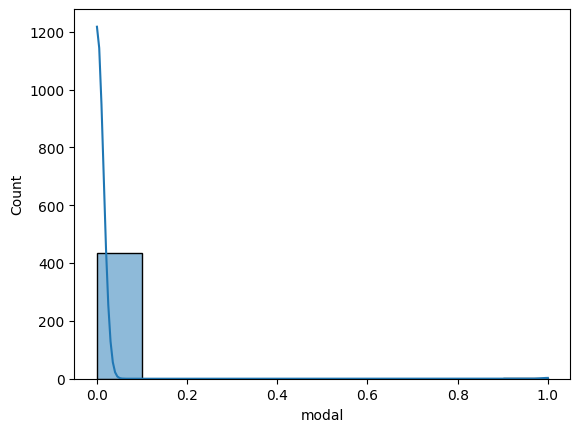

In [19]:
print(duckjin_df['modal'].value_counts())
sns.histplot(duckjin_df['modal'], kde=True)
plt.show()

C:\Users\qh123\AppData\Local\Temp\ipykernel_10812\1287939036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duckjin_df['start_time'] = pd.to_datetime(duckjin_df['start_time'], format='%H:%M').dt.hour
C:\Users\qh123\AppData\Local\Temp\ipykernel_10812\1287939036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duckjin_df['end_time'] = pd.to_datetime(duckjin_df['end_time'], format='%H:%M').dt.hour


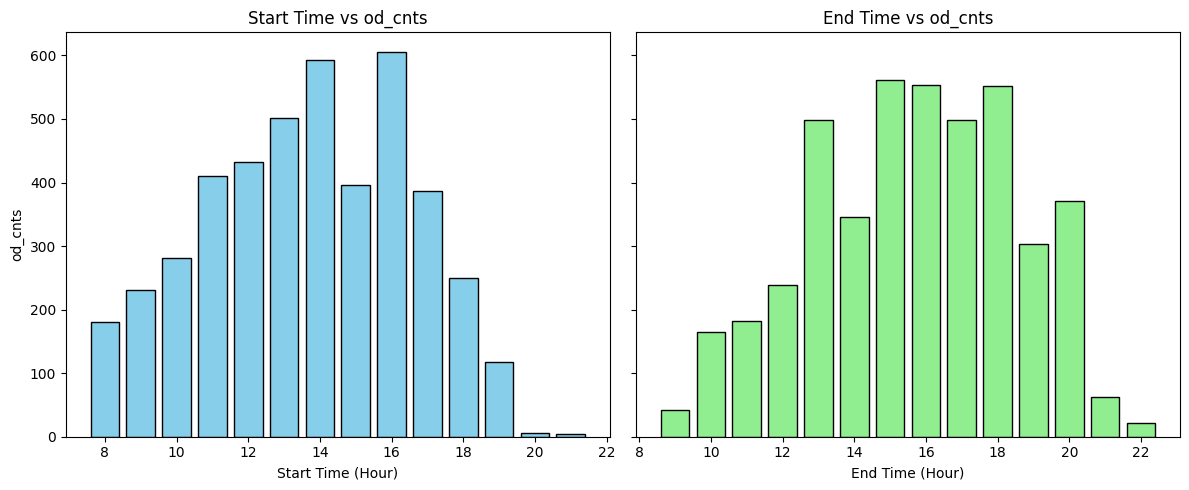

In [20]:
# 'start_time'과 'end_time' 컬럼을 시각화할 수 있는 형식으로 변환
duckjin_df['start_time'] = pd.to_datetime(duckjin_df['start_time'], format='%H:%M').dt.hour
duckjin_df['end_time'] = pd.to_datetime(duckjin_df['end_time'], format='%H:%M').dt.hour

data1 = duckjin_df.groupby('start_time')['od_cnts'].sum().reset_index()
data2 = duckjin_df.groupby('end_time')['od_cnts'].sum().reset_index()

# 그래프 그리기
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Start time 분포
axs[0].bar(data1['start_time'], data1['od_cnts'], color='skyblue', edgecolor='black')
axs[0].set_title('Start Time vs od_cnts')
axs[0].set_xlabel('Start Time (Hour)')
axs[0].set_ylabel('od_cnts')

# End time 분포
axs[1].bar(data2['end_time'], data2['od_cnts'], color='lightgreen', edgecolor='black')
axs[1].set_title('End Time vs od_cnts')
axs[1].set_xlabel('End Time (Hour)')

# 그래프 표시
plt.tight_layout()
plt.show()

In [32]:
map_filtered = pd.DataFrame()
for i in festival_df_grouped_sido['시도명']:
    # '시도명'별로 'od_cnts' 합계를 구한 후 'od_cnts' 기준으로 정렬
    junbok_filtered = festival_df_grouped_2[festival_df_grouped_2['시도명'] == i]
    if i == '세종특별자치시':
        festival_df_grouped_junbok = junbok_filtered.groupby('시도명')['od_cnts'].sum().reset_index()
    else:
        festival_df_grouped_junbok = junbok_filtered.groupby('시군구명')['od_cnts'].sum().reset_index()
    festival_df_grouped_junbok['시도명'] = i
    # 'od_cnts' 기준으로 내림차순 정렬
    festival_df_grouped_junbok = festival_df_grouped_junbok.sort_values(by='od_cnts', ascending=False)

    map_filtered = pd.concat([map_filtered, festival_df_grouped_junbok[festival_df_grouped_junbok['od_cnts'] >= 500]])
    # 결과 출력
    print(i)
    print(festival_df_grouped_junbok[festival_df_grouped_junbok['od_cnts'] >= 500])
    print()

#map_filtered.drop(columns=['시도명'], inplace=True)


전라북도
       시군구명  od_cnts   시도명
10  전주시 덕진구     2834  전라북도
11  전주시 완산구     1561  전라북도
9       장수군     1139  전라북도
7       익산시      772  전라북도
13      진안군      704  전라북도
1       군산시      592  전라북도

대전광역시
  시군구명  od_cnts    시도명
2   서구     1813  대전광역시
3  유성구     1379  대전광역시
1   동구     1207  대전광역시
4   중구      776  대전광역시
0  대덕구      562  대전광역시

경상남도
  시군구명  od_cnts   시도명
1  거창군      658  경상남도
9  진주시      560  경상남도

충청남도
  시군구명  od_cnts   시도명
2  금산군      882  충청남도

충청북도
  시군구명  od_cnts   시도명
3  영동군     1084  충청북도

경기도
Empty DataFrame
Columns: [시군구명, od_cnts, 시도명]
Index: []

대구광역시
  시군구명  od_cnts    시도명
1  달서구      656  대구광역시

경상북도
  시군구명  od_cnts   시도명
4  김천시      568  경상북도

광주광역시
Empty DataFrame
Columns: [시군구명, od_cnts, 시도명]
Index: []

세종특별자치시
       시도명  od_cnts
0  세종특별자치시      999

전라남도
Empty DataFrame
Columns: [시군구명, od_cnts, 시도명]
Index: []

서울특별시
Empty DataFrame
Columns: [시군구명, od_cnts, 시도명]
Index: []

부산광역시
Empty DataFrame
Columns: [시군구명, od_cnts, 시도명]
Index: []

인천광역시
Empty DataFrame
Co

In [33]:
map_filtered

,시군구명,od_cnts,시도명
10,전주시 덕진구,2834,전라북도
11,전주시 완산구,1561,전라북도
9,장수군,1139,전라북도
7,익산시,772,전라북도
13,진안군,704,전라북도
1,군산시,592,전라북도
2,서구,1813,대전광역시
3,유성구,1379,대전광역시
1,동구,1207,대전광역시
4,중구,776,대전광역시


In [34]:
address

,행정동코드,시도명,시군구명,읍면동명,동리명,위도,경도
0,1100000000,서울특별시,NaN,NaN,서울특별시,37.566679,126.978291
1,1111000000,서울특별시,종로구,NaN,종로구,37.580695,126.982799
2,1111051500,서울특별시,종로구,청운효자동,세종로,37.579997,126.976930
3,1111051500,서울특별시,종로구,청운효자동,옥인동,37.583480,126.963850
4,1111051500,서울특별시,종로구,청운효자동,누하동,37.578998,126.967561
...,...,...,...,...,...,...,...
21772,5183035000,강원특별자치도,양양군,강현면,정암리,38.143050,128.607330
21773,5183035000,강원특별자치도,양양군,강현면,용호리,38.132320,128.610700
21774,5183035000,강원특별자치도,양양군,강현면,전진리,38.124830,128.624220
21775,5183035000,강원특별자치도,양양군,강현면,물치리,38.158083,128.608889


In [40]:
# 추출한 행정동코드에 해당하는 데이터를 festival_df에서 필터링
#range_df = address[address['시군구명'].isin(list(map_filtered['시군구명']))]
# 두 데이터프레임을 시군구명과 시도명을 기준으로 병합
range_df = pd.merge(map_filtered, address[['행정동코드', '시도명', '시군구명', '위도', '경도']], 
                     on=['시도명', '시군구명'], how='left')

range_df = range_df.drop_duplicates(subset=['시군구명'], keep='first')

#range_df = pd.concat([range_df, address[address['행정동코드'] == 3600000000] ])  # 세종특별자치시는 직접추가
range_df = range_df.sort_values(by='od_cnts', ascending=False)
range_df

,시군구명,od_cnts,시도명,행정동코드,위도,경도
0,전주시 덕진구,2834,전라북도,4511300000,35.847561,127.117672
586,서구,1813,대전광역시,3017000000,36.355179,127.383849
46,전주시 완산구,1561,전라북도,4511100000,35.795512,127.132447
623,유성구,1379,대전광역시,3020000000,36.362073,127.356410
687,동구,1207,대전광역시,3011000000,35.886500,128.635500
105,장수군,1139,전라북도,4574000000,35.647000,127.521200
1194,영동군,1084,충청북도,4374000000,36.174759,127.783443
1566,NaN,999,세종특별자치시,3600000000,36.480000,127.289000
1077,금산군,882,충청남도,4471000000,36.108725,127.488150
735,중구,776,대전광역시,3014000000,36.325451,127.421174


In [46]:
import folium
import pandas as pd

# 한국 중앙 좌표로 지도 생성 (예: 서울 기준)
m = folium.Map(location=[36.007000, 127.660900], zoom_start=9)

# 기준이 되는 좌표(36.007000, 127.660900) 붉은 색 마커
folium.Marker(
    [36.007000, 127.660900],
    popup="축제 개최지",
    icon=folium.Icon(color='red')  # 붉은 색 마커
).add_to(m)

# 50km 반경의 원 그리기
folium.Circle(
    radius=50000,  # 반경 50000미터 = 50km
    location=[36.007000, 127.660900],
    popup="100km 반경",
    color="crimson",
    fill=True,
    fill_color="crimson"
).add_to(m)

# 나머지 좌표는 기본 마커로 표시
for idx, row in range_df.head(7).iterrows():
    folium.Marker(
        [row['위도'], row['경도']],
        popup=f"행정동코드: {row['행정동코드']}",
        icon=folium.Icon(color='blue')  # 기본 파란색 마커
    ).add_to(m)

# 나머지 좌표는 기본 마커로 표시
for idx, row in range_df.tail(11).iterrows():
    folium.Marker(
        [row['위도'], row['경도']],
        popup=f"행정동코드: {row['행정동코드']}",
        icon=folium.Icon(color='lightblue')  # 기본 파란색 마커
    ).add_to(m)

# 지도를 HTML 파일로 저장 (또는 주피터 노트북에 표시)
m.save("festival_map.html")

# 주피터 노트북에서 지도 바로 출력
m


## Stay 데이터

In [ ]:
import os
import pandas as pd

# 'data/raw_data' 경로 설정
root_dir = '../data/raw_data'
stay_df = pd.DataFrame()

# 전처리코드는 모두 여기에
def preprocess(df):
    # dest_hdong_cd 값이 축제가 열리는 곳인 무주군(4573025000) 데이터만 필터링
    filtered_df = df[df['hdong_cd'] == 4573025000]

    # 체류목적이 3(쇼핑여가), 4(기타), 5(여행) 인경우만 
    filtered_df = filtered_df[(filtered_df['purpose'] == 3) | 
                          (filtered_df['purpose'] == 4) | 
                          (filtered_df['purpose'] == 5)]

    return filtered_df

# 'stay'로 시작하는 폴더 내의 모든 CSV 파일 처리
for dirpath, dirnames, filenames in os.walk(root_dir):
    if os.path.basename(dirpath).startswith('stay'):
        for filename in filenames:
            if filename.endswith('.csv'):
                # 파일 이름에서 날짜 추출
                date_str = filename.split('_')[1]
                
                # 파일 경로 설정 및 CSV 읽기
                file_path = os.path.join(dirpath, filename)
                csv_data = pd.read_csv(file_path)
                
                # 전처리
                filtered_data = preprocess(csv_data)

                # 날짜에서 월일(MMDD) 부분 추출
                mmdd_str = date_str[4:]  # 'YYYYMMDD'에서 마지막 네 자리 'MMDD' 추출
                
                # 동적으로 변수 생성 (예: df_0901)
                globals()[f'df_{mmdd_str}'] = filtered_data
                
                # 데이터프레임 이름 출력 (예: df_0901)
                print(f"데이터프레임 df_{mmdd_str}가 생성되었고, 기존데이터프레임에 포함합니다.")
                stay_df = pd.concat([stay_df, globals()[f'df_{mmdd_str}']])

In [31]:
"""
축제기간과 축제기간이 아닌 날의 데이터를 구분지어 불러오기
축제기간: 23.09.02~23.09.10
비축제기간: 23.09.11~23.10.15
"""
festival_stay_df = stay_df[(stay_df['date'] >= 20230902) & (stay_df['date'] <= 20230910)]
non_festival_stay_df = stay_df[(stay_df['date'] >= 20230911) & (stay_df['date'] <= 20230920)]

In [ ]:
festival_stay_df

In [ ]:
non_festival_stay_df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 분포 시각화를 위한 함수 정의
def plot_distributions(column):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # 왼쪽: festival_df 분포
    sns.histplot(festival_stay_df[column], kde=True, ax=axes[0], color='blue')
    axes[0].set_title(f'Festival: {column} Distribution')

    # 오른쪽: non_festival_df 분포
    sns.histplot(non_festival_stay_df[column], kde=True, ax=axes[1], color='orange')
    axes[1].set_title(f'Non-Festival: {column} Distribution')

    plt.tight_layout()
    plt.show()

# 비교하고 싶은 컬럼별로 분포 시각화 실행
for column in ['time', 'gender', 'age']:  # 원하는 컬럼을 여기에 추가
    plot_distributions(column)

In [35]:
# 날짜별 od_cnts 합산 (축제 기간과 비축제 기간)
festival_stay_df_grouped = festival_stay_df.groupby('date')['stay_cnts'].sum().reset_index()
non_festival_stay_df_grouped = non_festival_stay_df.groupby('date')['stay_cnts'].sum().reset_index()

In [ ]:
# 주말 날짜 리스트
weekend_dates = [20230902, 20230903, 20230909, 20230910, 20230916, 20230917, 20230923, 20230924, 20230930, 20231001, 2023107, 20231008, 20231014, 20231015]

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# 왼쪽: festival_df 날짜별 od_cnts 합산 시각화
sns.barplot(x='date', y='stay_cnts', data=festival_stay_df_grouped, ax=axes[0], palette='Blues_d')
axes[0].set_title('Festival Period: STAY Counts by Date')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total OD Counts')

# 주말 날짜 빨간색 처리
xticks = axes[0].get_xticks()
xticklabels = axes[0].get_xticklabels()
for i, label in enumerate(xticklabels):
    date_value = int(label.get_text())
    if date_value in weekend_dates:
        label.set_color('red')

axes[0].set_xticklabels(xticklabels, rotation=45)

# 오른쪽: non_festival_df 날짜별 od_cnts 합산 시각화
sns.barplot(x='date', y='stay_cnts', data=non_festival_stay_df_grouped, ax=axes[1], palette='Oranges_d')
axes[1].set_title('Non-Festival Period: STAY Counts by Date')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total OD Counts')

# 주말 날짜 빨간색 처리
xticks = axes[1].get_xticks()
xticklabels = axes[1].get_xticklabels()
for i, label in enumerate(xticklabels):
    date_value = int(label.get_text())
    if date_value in weekend_dates:
        label.set_color('red')

axes[1].set_xticklabels(xticklabels, rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
dd

In [ ]:
import os
import pandas as pd

# 'data/raw_data' 경로 설정
root_dir = '../data/raw_data'

# 'od'로 시작하는 폴더 내의 모든 CSV 파일 처리
for dirpath, dirnames, filenames in os.walk(root_dir):
    if os.path.basename(dirpath).startswith('od'):
        for filename in filenames:
            if filename.endswith('.csv'):
                # 파일 이름에서 날짜 추출
                date_str = filename.split('_')[1]
                
                # 파일 경로 설정 및 CSV 읽기
                file_path = os.path.join(dirpath, filename)
                csv_data = pd.read_csv(file_path)
                
                # dest_hdong_cd 값이 축제가 열리는 곳인 무주군(4573025000) 데이터만 필터링
                filtered_data = csv_data[csv_data['dest_hdong_cd'] == 4573025000]
                
                # 날짜에서 월일(MMDD) 부분 추출
                mmdd_str = date_str[4:]  # 'YYYYMMDD'에서 마지막 네 자리 'MMDD' 추출
                
                # 동적으로 변수 생성 (예: df_0901)
                globals()[f'df_{mmdd_str}'] = filtered_data
                
                # 데이터프레임 이름 출력 (예: df_0901)
                print(f"데이터프레임 df_{mmdd_str}가 생성되었고, 필터링된 데이터만 포함합니다.")



In [ ]:
"""
축제기간과 축제기간이 아닌 날의 데이터를 구분지어 불러오기
축제기간: 23.09.02~23.09.10
비축제기간: 23.09.11~23.10.15
"""
# 0902 ~ 0910 사이의 데이터프레임만 불러오기
df_festival_list = []

for day in range(902, 911):
    df_name = f'df_{day:04d}'  # 0902, 0903 등의 형식으로 변수 이름 생성
    if df_name in globals():
        df_festival_list.append(globals()[df_name])
        print(f"{df_name} 데이터프레임이 불러와졌습니다.")
    else:
        print(f"{df_name} 데이터프레임이 존재하지 않습니다.")

print("-"*40)

# 0911 ~ 1015 사이의 데이터프레임만 불러오기
df_non_festival_list = []

# 9월 11일 ~ 9월 30일
for day in range(911, 931):
    df_name = f'df_{day:04d}'  # 0911, 0912 등의 형식으로 변수 이름 생성
    if df_name in globals():
        df_non_festival_list.append(globals()[df_name])
        print(f"{df_name} 데이터프레임이 불러와졌습니다.")
    else:
        print(f"{df_name} 데이터프레임이 존재하지 않습니다.")

# 10월 1일 ~ 10월 15일
for day in range(1001, 1016):
    df_name = f'df_{day:04d}'  # 1001, 1002 등의 형식으로 변수 이름 생성
    if df_name in globals():
        df_non_festival_list.append(globals()[df_name])
        print(f"{df_name} 데이터프레임이 불러와졌습니다.")
    else:
        print(f"{df_name} 데이터프레임이 존재하지 않습니다.")

In [ ]:
df = df_festival_list[0]
df

In [ ]:
df.isna().sum()

In [ ]:
df['origin_purpose'].unique()

In [ ]:
df['dest_purpose'].unique()